# Self Organizing Map:
A unsupervised Techniques used for Feature detection

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Import the dataset

dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
# import the Self Organizing Map
from minisom import MiniSom

In [6]:
# Training the Self Organizing Map
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

som.random_weights_init (X)
som.train_random(data = X, num_iteration = 100)

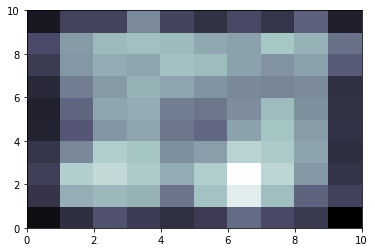

In [7]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
plt.show()

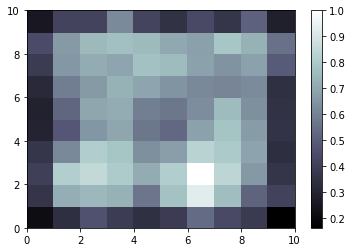

In [8]:
# colorbar
bone()
pcolor(som.distance_map().T)
colorbar()
plt.show()

In [9]:
markers = ['o', 's']
colors = ['r', 'g']


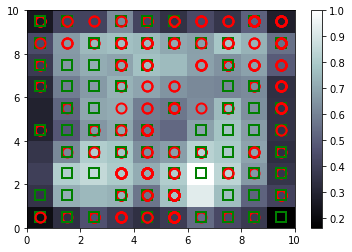

In [10]:
bone()
pcolor(som.distance_map().T)
colorbar()
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [11]:
# Find the frauds
mappings = som.win_map(X)


In [12]:
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds

array([[ 0.19047698,  0.68873723, -0.54017523, -0.25303263,  0.54294996,
         1.52897468, -0.34796495, -0.47797966,  0.95465038,  1.15714435,
         0.94661602, -0.91919518,  0.23782765, -1.06963731,  1.16043727],
       [ 0.37218667,  0.68873723, -0.96230566,  0.90284975,  0.54294996,
         0.17049859, -0.34796495, -0.16698301,  0.95465038,  1.15714435,
         0.12347166,  1.08790822,  0.23782765, -0.83712577, -0.19003527],
       [ 0.48326413,  0.68873723, -0.8643714 ,  0.55105946,  0.54294996,
        -0.37289184, -0.34796495, -0.24174182,  0.95465038,  1.15714435,
        -0.28810053, -0.91919518,  0.23782765, -0.60461424,  1.6869122 ],
       [-0.62487946, -1.45193254, -1.13875618, -0.88122958,  2.86987838,
         1.52897468, -1.85484246,  2.32547572, -1.04750391, -0.86419641,
        -0.49388662,  1.08790822, -3.11117398,  0.67419921, -0.19541334],
       [ 0.29149211, -1.45193254, -0.75124044, -0.8892705 ,  0.54294996,
         0.98558424, -0.34796495, -0.44060026, 

In [13]:
frauds = sc.inverse_transform(frauds)

In [14]:
frauds

array([[1.5704081e+07, 1.0000000e+00, 2.5170000e+01, 3.5000000e+00,
        2.0000000e+00, 1.3000000e+01, 4.0000000e+00, 6.2500000e-01,
        1.0000000e+00, 1.0000000e+00, 7.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 7.0600000e+03],
       [1.5717065e+07, 1.0000000e+00, 2.0170000e+01, 9.2500000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6650000e+00,
        1.0000000e+00, 1.0000000e+00, 3.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 4.0000000e+01, 2.9000000e+01],
       [1.5725002e+07, 1.0000000e+00, 2.1330000e+01, 7.5000000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.4150000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+01, 9.8010000e+03],
       [1.5645820e+07, 0.0000000e+00, 1.8080000e+01, 3.7500000e-01,
        3.0000000e+00, 1.3000000e+01, 1.0000000e+00, 1.0000000e+01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00,